# Project - Car Price Prediction

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper.

In [67]:
#lets import pandas library to read the data
import pandas as pd
df = pd.read_excel('Combined.xlsx')
df

,Site,Model,Fuel,Km,Location,Year,Cost
0,CARS24,"Maruti Suzuki Alto 800 LXI, 2010",Petrol,59298,DELHI,2010.0,166467.0
1,CARS24,"Honda Jazz 1.5 VX i DTEC, 2009",NaN,54000,KANPUR,2009.0,545577.0
2,CARS24,"Datsun GO T, 2017",Petrol,66336,AHMEDABAD,2017.0,260000.0
3,CARS24,Hyundai Grand i10 2017 Petrol 13750 Km Driven,Petrol,13750,NAVI MUMBAI,2017.0,449000.0
4,CARS24,Hyundai Elite i20 sportz 2018 Petrol 25000 Km ...,Petrol,25000,DELHI,2018.0,590000.0
...,...,...,...,...,...,...,...
5672,olx,Wedding vintage car,NaN,77170,BERHMAPUR,2015.0,725000.0
5673,olx,Wedding vintage car,NaN,43000,AJMER,2014.0,725000.0
5674,olx,Wedding vintage car,NaN,58000,CHANOD,2014.0,714000.0
5675,olx,Wedding vintage car,NaN,13000,PATHSALA,2020.0,715000.0


Here in this dataset we have train excel file. So to build a model using Machine Learning in order to predict the actual value we have to do preprocessing on train dataset and predict the output.

# Data Pre-processing

There is some process that we have to do while pre-processing.

1.Our dataset is not always in proper format. Sometimes there maybe some missing values, sometimes there must be out of the box values. Our data is always a raw data so for that we have to do some wrangling process.

2.Check the data type of each column.

3.Check the summary of our dataset.

In [68]:
#Check the columns name
df.columns

Index(['Site', 'Model', 'Fuel', 'Km', 'Location', 'Year', 'Cost'], dtype='object')

In [69]:
df.isnull().sum()  #check null values

Site          0
Model         0
Fuel        224
Km            7
Location      0
Year         16
Cost          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5441 entries, 0 to 5667
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Site      5441 non-null   int32  
 1   Model     5441 non-null   int32  
 2   Fuel      5441 non-null   int32  
 3   Km        5441 non-null   int32  
 4   Location  5441 non-null   int32  
 5   Year      5441 non-null   float64
 6   Cost      5441 non-null   float64
dtypes: float64(2), int32(5)
memory usage: 233.8 KB
AxesSubplot(0.125,0.125;0.62x0.755)


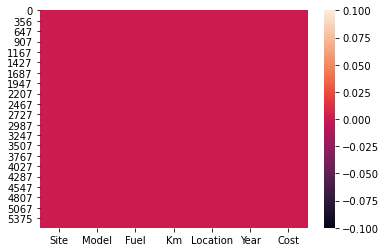

In [78]:
import seaborn as sns             #visualization library to see null values graphically
import matplotlib.pyplot as plt   #another visualization library to plot the output
pd.options.display.max_info_columns = 7   #check the columns info if any null values present
df.info()                              #displays the info
print(sns.heatmap(df.isnull()))

In [71]:
df = df.dropna()  #drop null values

In [73]:
df.isnull().sum()

Site        0
Model       0
Fuel        0
Km          0
Location    0
Year        0
Cost        0
dtype: int64

In [74]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['Site', 'Model', 'Fuel', 'Km', 'Location'], dtype='object')


In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for Site in objList:
    df[Site] = le.fit_transform(df[Site].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5441 entries, 0 to 5667
Columns: 7 entries, Site to Cost
dtypes: float64(2), int32(5)
memory usage: 233.8 KB
None


In [76]:
df.head()

,Site,Model,Fuel,Km,Location,Year,Cost
0,0,1062,8,1835,25,2010.0,166467.0
2,0,78,8,2013,1,2017.0,260000.0
3,0,443,8,421,79,2017.0,449000.0
4,0,418,8,892,25,2018.0,590000.0
5,0,1179,8,2003,21,2006.0,190000.0


In [127]:
df.dtypes

Site          int32
Model         int32
Fuel          int32
Km            int32
Location      int32
Year        float64
Cost        float64
dtype: object

In [129]:
df.describe()  #Calculates the data statistically of all columns

,Site,Model,Fuel,Km,Location,Year,Cost
count,5441.000000,5441.000000,5441.000000,5441.000000,5441.000000,5441.000000,5.441000e+03
mean,0.237089,940.049256,6.935674,1430.824665,107.357103,2013.956809,5.327314e+05
std,0.553756,475.230098,1.480230,794.058881,25.151932,3.109900,5.738452e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,1991.000000,1.490000e+02
25%,0.000000,560.000000,6.000000,758.000000,115.000000,2012.000000,2.836990e+05
50%,0.000000,945.000000,8.000000,1467.000000,116.000000,2014.000000,3.911990e+05
75%,0.000000,1287.000000,8.000000,2116.000000,116.000000,2016.000000,6.000000e+05
max,2.000000,1799.000000,9.000000,2782.000000,117.000000,2021.000000,1.450000e+07


# EDA

# Univariate

In this step we have to do the analysis of each column using univariate method. So for this I have used Count method to check the number of unique values present in that particular column and also some visualization libraries to understand our data more clearly.



0    4493
1     606
2     342
Name: Site, dtype: int64


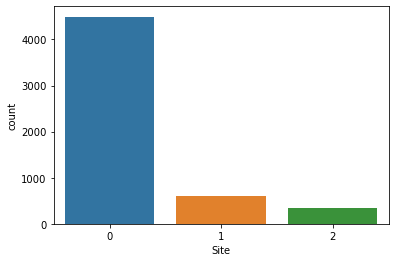

In [130]:
a=df['Site'].value_counts()   #check the values of each column 
print(a)
sns.countplot(x = 'Site',data = df)

In [131]:
a=df['Model'].value_counts()
print(a)

1244    135
1207    127
1304     99
846      95
864      90
       ... 
1381      1
1385      1
1389      1
1393      1
1797      1
Name: Model, Length: 1800, dtype: int64


In [132]:
a=df['Fuel'].value_counts()
print(a)

8    2877
6    2072
2     171
4     153
9     143
0       9
1       8
5       6
7       1
3       1
Name: Fuel, dtype: int64


In [133]:
a=df['Km'].value_counts()
print(a)

2363    52
1855    41
2116    37
1559    36
2599    35
        ..
111      1
2472     1
107      1
2154     1
2288     1
Name: Km, Length: 2783, dtype: int64


In [134]:
a=df['Location'].value_counts()
print(a)
#sns.countplot(x = 'Location',data = df)

116    2627
117    1122
114     465
115     420
113     141
       ... 
38        2
42        2
46        2
54        2
0         2
Name: Location, Length: 118, dtype: int64


In [135]:
a=df['Year'].value_counts()
print(a)

2015.0    640
2014.0    625
2012.0    621
2013.0    580
2016.0    564
2017.0    509
2011.0    415
2010.0    382
2018.0    377
2019.0    254
2009.0    186
2008.0     95
2020.0     85
2007.0     34
2006.0     24
2021.0     15
2005.0      9
2003.0      8
2004.0      7
2000.0      4
2001.0      2
1999.0      2
2002.0      2
1991.0      1
Name: Year, dtype: int64


In [136]:
a=df['Cost'].value_counts()
print(a)

525000.0    33
350000.0    32
325000.0    27
650000.0    25
500000.0    25
            ..
547599.0     1
272399.0     1
283399.0     1
474099.0     1
850199.0     1
Name: Cost, Length: 2296, dtype: int64


# Bivariate

Seaborn and Matplotlib are two visualization libraries that used to visualize graphically data. In Bivariate method we have taken two variable one is target variable (Cost) and other variable as all columns. In this way we have to visualize all variables with our target variable.

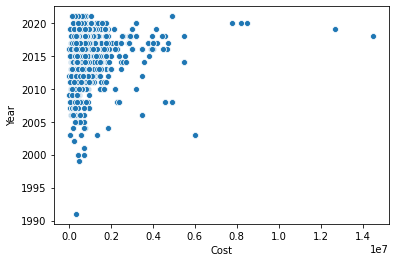

In [137]:
sns.scatterplot(x=df.Cost,y=df.Year)

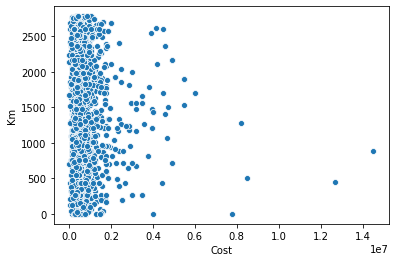

In [138]:
sns.scatterplot(x=df.Cost,y=df.Km)

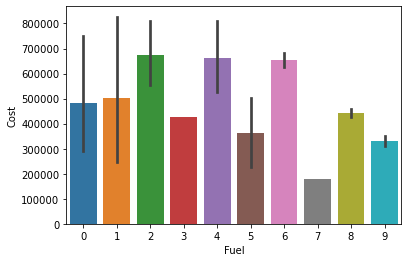

In [139]:
sns.barplot(x='Fuel',y='Cost',data=df)
plt.show()

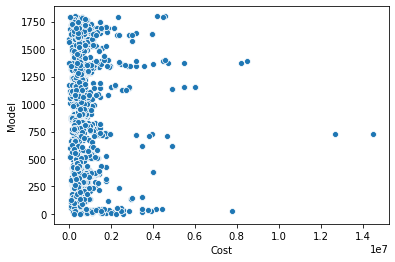

In [140]:
sns.scatterplot(x=df.Cost,y=df.Model)

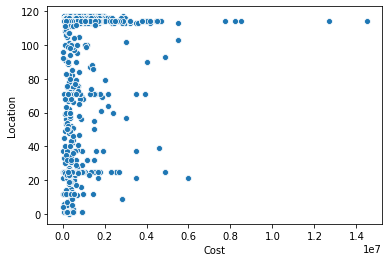

In [141]:
sns.scatterplot(x=df.Cost,y=df.Location)

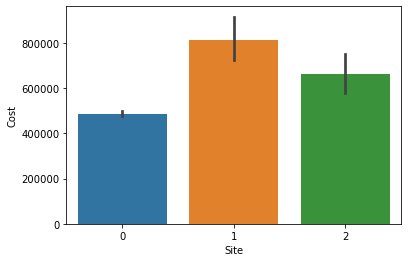

In [142]:
sns.barplot(x='Site',y='Cost',data=df)
plt.show()

# Correlation between columns

This above method is used to check the correlation between all columns. Heatmap method gives the graphical visualization from which we can easily understand the correlation.

In [143]:
df.corr()   #find the pairwise correlation of all columns in the dataframe

,Site,Model,Fuel,Km,Location,Year,Cost
Site,1.000000,-0.023834,-0.616272,0.029453,-0.499358,-0.037283,0.148486
Model,-0.023834,1.000000,-0.125107,-0.008273,-0.001784,-0.017323,-0.002001
Fuel,-0.616272,-0.125107,1.000000,-0.055688,0.479374,0.061611,-0.161020
Km,0.029453,-0.008273,-0.055688,1.000000,-0.023764,-0.116502,-0.048238
Location,-0.499358,-0.001784,0.479374,-0.023764,1.000000,0.108188,-0.061853
Year,-0.037283,-0.017323,0.061611,-0.116502,0.108188,1.000000,0.263742
Cost,0.148486,-0.002001,-0.161020,-0.048238,-0.061853,0.263742,1.000000


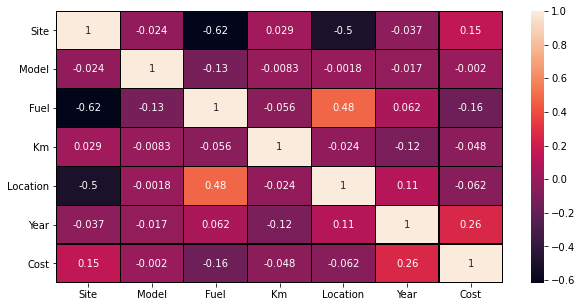

In [144]:
#lets check the correlation using heatmap for better understanding
plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),linewidths=.1,linecolor='black', annot=True)

Some columns are making good positive correlation with our target variable and some has negative correlation. So the variables that doesn’t make any good correlation with any variable so we to drop that column from the dataset.

# Checking outliers

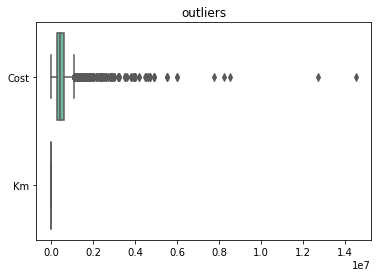

In [145]:
sns.boxplot(data=df[['Cost','Km']],orient='h',palette='Set2')
plt.title('outliers')
plt.show()

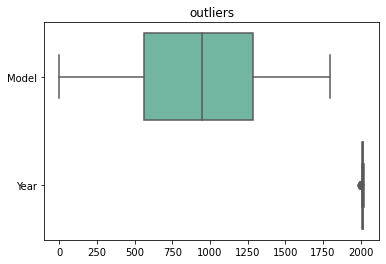

In [146]:
sns.boxplot(data=df[['Model','Year']],orient='h',palette='Set2')
plt.title('outliers')
plt.show()

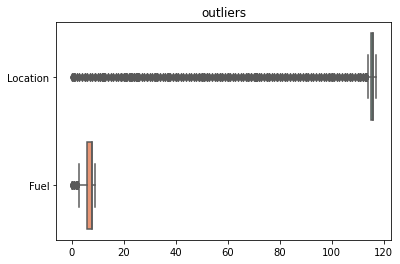

In [147]:
sns.boxplot(data=df[['Location','Fuel']],orient='h',palette='Set2')
plt.title('outliers')
plt.show()

Outliers are present in our dataset. So we have to remove that outliers to get the proper results.

# Removing outliers

In [79]:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
thresholds=3
df_new=df[(z<3).all(axis=1)]

In [80]:
print([df.shape],[df_new.shape])

[(5441, 7)] [(4884, 7)]


In [81]:
percent_loss=((557/5441)*100)
print(percent_loss)

10.23708877044661


In [156]:
#lets check the skewness of all columns
df.skew()

Site        2.255747
Model      -0.133437
Fuel       -1.484504
Km         -0.092628
Location   -2.897501
Year       -0.402159
Cost        8.560393
dtype: float64

Percentage loss of our data is more than 5%, so we have to remove outliers. First we have to split our data in x,y variable to make the predictions.

1. x variable should contain all columns except target variable.

2. y variable should contain target variable i.e. Cost

In [48]:
#lets split the data into x and y variable(input & output)
x=df.drop(columns=["Cost"])
y=df[["Cost"]] #this is our target variable

In [49]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [50]:
#Scaling is used to bring the dataset in common range
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledx=sc.fit_transform(x)

StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).

# Splitting the dataframe

Now we have to split our data in training and testing form. And we have apply some machine learning modules.

1.Our target variable is in linear form so we have to apply linear regression method.

2.We can also apply other regression methods to check which machine learning model gives better accuracy.

In [83]:
#finding best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=.2,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f'Best accuracy {accu*100} on random_state {best_rstate}') 

Best accuracy 58.11459638158256 on random_state 131


In [88]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2s=r2_score(y_test,y_pred)
cvs=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print('Accuracy=',r2s*100,'cvs=',cvs*100)

Accuracy= 22.967994255082445 cvs= 22.91247008991739


From above we can say that linear regression gives 58.11% accuracy and Randomforest regrssor gives 23% accuracy. So linear regression method works better for our model. 

# Model Saving

We have to save our model using pickle method or joblib method.

In [89]:
import pickle
filename='carprice.pkl'
pickle.dump(mod,open(filename,'wb'))

# Conclusion

1.In the experimentation phase two different machine learning algorithms were employed for the proposed model development and their performances were evaluated on various parameters.

2.From all above process we can say that whatever algorithms or method we used for prediction of our model all process with visualization is very beneficial. Using any visualization library it is easy for us to understand the all data.

3.For this data Linear regression proves the best and others we have used also has good result but while using Linear regression with different random state, it also gives the more than 58% accuracy.